In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import copy
%matplotlib inline

In [88]:
N=50
N1=N
N2=25
BETA=0.1
MAX_IT=200
Nc=BETA*N
RO=5
TAMANHO_MUTACAO=2
INTERVALO=512

In [89]:
def func_aptidao(individuo):
    x=individuo
    a = (x[1]+47)*np.sin(np.sqrt(np.abs(x[1]+(x[0]/2)+47)))+x[0]*np.sin(np.sqrt(np.abs(x[0]-(x[1]+47))))+1500
    return a

In [90]:
def selecao(populacao):
    aptidoes=[]
    for individuo in populacao:
        aptidoes.append([func_aptidao(individuo),individuo])
    aptidoes.sort(reverse=True)
    if len(aptidoes) > N1:
        del aptidoes[N1:len(aptidoes)]
    nova_populacao =[]
    
    for index_individuo in range(len(aptidoes)):
        nova_populacao.append(aptidoes[index_individuo][1])
        
    return nova_populacao

In [91]:
def clone(populacao):
    nova_populacao=[]
    Dmax= func_aptidao(populacao[0])
    for individuo in populacao:
        nova_populacao.append([individuo[0],individuo[1]])
        D=func_aptidao(individuo)
        for i in range(int((D/Dmax)*Nc)):
            nova_populacao.append([individuo[0],individuo[1]])
    return nova_populacao

In [92]:
def mutacao(populacao):
    Dmax= func_aptidao(populacao[0])
    for index_individuo, individuo in enumerate(populacao):
        D=func_aptidao(individuo)
        alpha = np.exp(-RO*(D/Dmax))
        for index_alelo, alelo in enumerate(individuo):
            if np.random.random() < alpha:            
                populacao[index_individuo][index_alelo] += np.random.uniform(low=-TAMANHO_MUTACAO, high=TAMANHO_MUTACAO)
                if ( populacao[index_individuo][index_alelo]>INTERVALO):
                     populacao[index_individuo][index_alelo]=INTERVALO
                elif ( populacao[index_individuo][index_alelo]<-INTERVALO):
                     populacao[index_individuo][index_alelo]=-INTERVALO
    return populacao

In [93]:
def substitui(populacao):
    populacao_aletoria = np.random.uniform(low=-INTERVALO, high=INTERVALO, size=(N2,2))
    del populacao[len(populacao)-N2:len(populacao)]    
    return list(it.chain(populacao,populacao_aletoria))

In [94]:
def erro(populacao):
    erro = 0
    maior = func_aptidao(populacao[0])
    for i in populacao:
        aptidao= func_aptidao(i)
        erro += aptidao
        if (aptidao>maior):
            maior=aptidao
    return (erro/N),maior

In [95]:
def plotErros(erros,maiores):
    plt.figure(figsize=(15, 5))
    plt.plot(erros)
    plt.plot(maiores)
    plt.legend(['Média', 'Maior'])

In [96]:
def algoritmoCLONAL_OPT():
    populacao = np.random.uniform(low=-INTERVALO, high=INTERVALO, size=(N,2))
    erro_por_geracao = []
    maior_por_geracao = []
    for i in range(MAX_IT):
        nova_populacao=selecao(populacao)
        nova_populacao=clone(nova_populacao)
        nova_populacao=mutacao(nova_populacao)
        nova_populacao =selecao(nova_populacao)
        if (i==MAX_IT-1):
            populacao = nova_populacao
        else:
            populacao = substitui(nova_populacao)
        err,maior = erro(populacao)
        erro_por_geracao.append(err)
        maior_por_geracao.append(maior)
    return {(1500-func_aptidao(individuo)) : individuo for individuo in populacao}, erro_por_geracao,maior_por_geracao

f( x1 = 512, x2 = 404.237828176 ) = -959.640621478


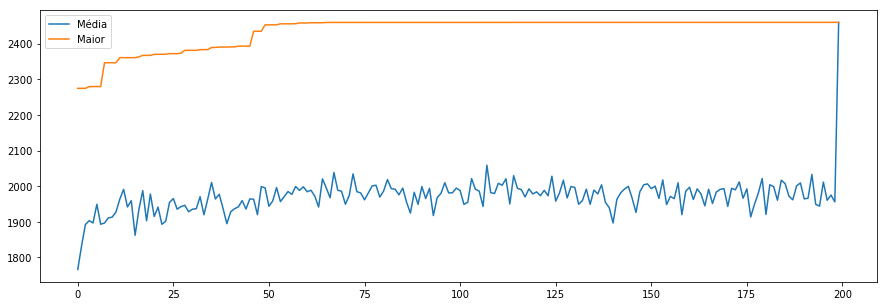

In [99]:
minimos,erros,maiores=algoritmoCLONAL_OPT()
for aptidao, individuo in minimos.items():
    print ("f( x1 = "+str(individuo[0])+ ", x2 = "+str(individuo[1]) +" ) = "+ str(aptidao) )
plotErros(erros,maiores)